In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Bio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSerov/rdkit/denis/to_gc_cont.csv')

In [ ]:
df

,Unnamed: 0,SMDBid,Field1_links,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration,Efficacy,Trust,Reference,Field8_links,percent_mismatch,Tm,siRNA sense GC content,siRNA antisense GC content
0,12,SM5317,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Methoxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,14,15,16,17,18 * 2,7,10,...",10 nM,40.77 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019,NaN,39.828116,0.190476,0.222222
1,13,SM5316,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Deoxy* ...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,42.17 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019,NaN,39.828116,0.190476,0.222222
2,14,SM5315,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Hydroxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,44.11 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019,NaN,39.828116,0.190476,0.222222
3,15,SM5314,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,65.16 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019,NaN,39.828116,0.190476,0.222222
4,16,SM5313,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,60.4 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019,NaN,39.828116,0.190476,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,4889,SM0005,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10 nM,81.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453,NaN,53.817293,0.500000,0.571429
3431,4890,SM0004,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10 nM,35.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453,NaN,53.817293,0.500000,0.571429
3432,4891,SM0003,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10 nM,54.2 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453,85.714286,53.494783,0.523810,0.571429
3433,4892,SM0002,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10 nM,76.8 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453,85.714286,53.494783,0.523810,0.571429


In [ ]:
def filter_dataframe_by_modifications_both_columns(df, column_name1, column_name2, modifications):
    """
    Filters a DataFrame to keep only cells where *both* specified columns
    contain exactly one of the specified modifications.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column_name1 (str): Name of the first column to filter.
        column_name2 (str): Name of the second column to filter.
        modifications (list): List of modification strings to match.

    Returns:
         pd.DataFrame: Filtered DataFrame.
    """
    def check_modifications(cell_value, modifications):
         if not isinstance(cell_value, str):
              return False
         return any(mod == cell_value.strip() for mod in modifications)

    filtered_df = df[df.apply(lambda row: check_modifications(row[column_name1], modifications) and
                                          check_modifications(row[column_name2], modifications), axis=1)]
    return filtered_df

In [ ]:
modifications_list1 = [
        "2-Methoxy",
        "2-O-Methyl",
        "2-O-Methylribose",
        "2-O-Methlyribose",
        "2-O-Methyl ribose",
        "2-Methoxyribose",
        "O-Methyl"
    ]

In [ ]:
modifications_list2 = [
            "2,4-bridged nucleic acid",
            "Locked nucleic acid",
            "2,4-Locked nucleic acid",
            "Alfa-L-Locked nucleic acid",
            "2,4-Carbocyclic-Locked nucleic acid-Locked nucleic acid"
        ]

In [ ]:
modifications_list4 = [
            "DeoxyThymidine",
            "Thymidine",
            "2-Deoxythymidine",
            "2-Deoxythymidine (Mutation)"
        ]

In [ ]:
modifications_list3 = [
            "2-Fluoro",
            "2-Fluororibose",
            "2-Deoxy-2-Fluoro",
            "2-Deoxy-2-fluororibose",
            "2-Deoxy-2-Fluoroarabinonucleic acid",
            "2-Deoxy-2-fluorouridine"
        ]

In [ ]:
filtered_df1 = filter_dataframe_by_modifications_both_columns(df, 'Modification sense', 'Modification antisense', modifications_list1)
filtered_df2 = filter_dataframe_by_modifications_both_columns(df, 'Modification sense', 'Modification antisense', modifications_list2)
filtered_df3 = filter_dataframe_by_modifications_both_columns(df, 'Modification sense', 'Modification antisense', modifications_list3)
filtered_df4 = filter_dataframe_by_modifications_both_columns(df, 'Modification sense', 'Modification antisense', modifications_list4)

In [ ]:
def remove_rows_with_asterisk(df, column_name1, column_name2):
    """
    Removes rows from a DataFrame if either of the specified columns contains an asterisk (*).

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name1 (str): Name of the first column to check.
        column_name2 (str): Name of the second column to check.

    Returns:
        pd.DataFrame: A new DataFrame with rows containing '*' removed.
    """
    def check_asterisk(cell_value):
        if isinstance(cell_value, str):
            return '*' in cell_value
        return False

    rows_to_drop = df.apply(lambda row: check_asterisk(row[column_name1]) or check_asterisk(row[column_name2]), axis=1)
    filtered_df = df[~rows_to_drop]
    return filtered_df

filtered_df1 = remove_rows_with_asterisk(filtered_df1, 'Modification sense', 'Modification antisense')
filtered_df2 = remove_rows_with_asterisk(filtered_df2, 'Modification sense', 'Modification antisense')
filtered_df3 = remove_rows_with_asterisk(filtered_df3, 'Modification sense', 'Modification antisense')



In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSerov/Modif/final_data_before_getting_descriptors (2) - final_data_before_getting_descriptors (2).csv')
new_df1 = new_df[new_df['SMDBid'].isin(filtered_df1['SMDBid'])]
new_df1['category'] = '2-Methoxy'
new_df2 = new_df[new_df['SMDBid'].isin(filtered_df2['SMDBid'])]
new_df2['category'] = 'Locked nucleic acid'
new_df3 = new_df[new_df['SMDBid'].isin(filtered_df3['SMDBid'])]
new_df3['category'] = '2-Fluororibose'
new_df4 = new_df[new_df['SMDBid'].isin(filtered_df4['SMDBid'])]
new_df4['category'] = "DeoxyThymidine"

<ipython-input-11-4418060efe30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['category'] = '2-Methoxy'
<ipython-input-11-4418060efe30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['category'] = 'Locked nucleic acid'
<ipython-input-11-4418060efe30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
final_df = pd.concat([new_df1, new_df2])
final_df = pd.concat([final_df, new_df3])
final_df = pd.concat([final_df, new_df4])

In [ ]:
final_df

,SMDBid,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %",category
494,SM4759,"[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",0.025677,17,44,8,3,16.0,50.0,2-Methoxy
495,SM4758,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.075608,17,40,8,3,16.0,50.0,2-Methoxy
498,SM4755,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.045167,17,40,8,3,16.0,50.0,2-Methoxy
722,SM4218,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,4,5,4,18,4.0,71.0,2-Methoxy
723,SM4217,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,4,5,4,18,4.0,69.0,2-Methoxy
...,...,...,...,...,...,...,...,...,...,...,...
583,SM4371,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.008000,4,14,8,18,48.0,69.0,DeoxyThymidine
720,SM4225,"[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,3,7,4,18,24.0,80.0,DeoxyThymidine
721,SM4219,"[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,3,8,4,18,24.0,94.0,DeoxyThymidine
1632,SM2391,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.000000,4,28,4,18,24.0,40.0,DeoxyThymidine


In [ ]:
efficacy = final_df['Efficacy, %']/100 + 1
to_log = (efficacy)/final_df['Concentration, nM'] * final_df['Duration after transfection']
final_df['Normalized_value'] =np.log10(((final_df['Efficacy, %'])/(final_df['Concentration, nM'] * final_df['Duration after transfection'])) + 1)
final_df

,SMDBid,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %",category,Normalized_value
494,SM4759,"[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",0.025677,17,44,8,3,16.0,50.0,2-Methoxy,2.088860
495,SM4758,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.075608,17,40,8,3,16.0,50.0,2-Methoxy,1.626665
498,SM4755,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.045167,17,40,8,3,16.0,50.0,2-Methoxy,1.846261
722,SM4218,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,4,5,4,18,4.0,71.0,2-Methoxy,0.373902
723,SM4217,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,4,5,4,18,4.0,69.0,2-Methoxy,0.366782
...,...,...,...,...,...,...,...,...,...,...,...,...
583,SM4371,"[""Nc1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",0.008000,4,14,8,18,48.0,69.0,DeoxyThymidine,2.256928
720,SM4225,"[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,3,7,4,18,24.0,80.0,DeoxyThymidine,0.099131
721,SM4219,"[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""O=c1ccN(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...",13.000000,3,8,4,18,24.0,94.0,DeoxyThymidine,0.114371
1632,SM2391,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10.000000,4,28,4,18,24.0,40.0,DeoxyThymidine,0.066947


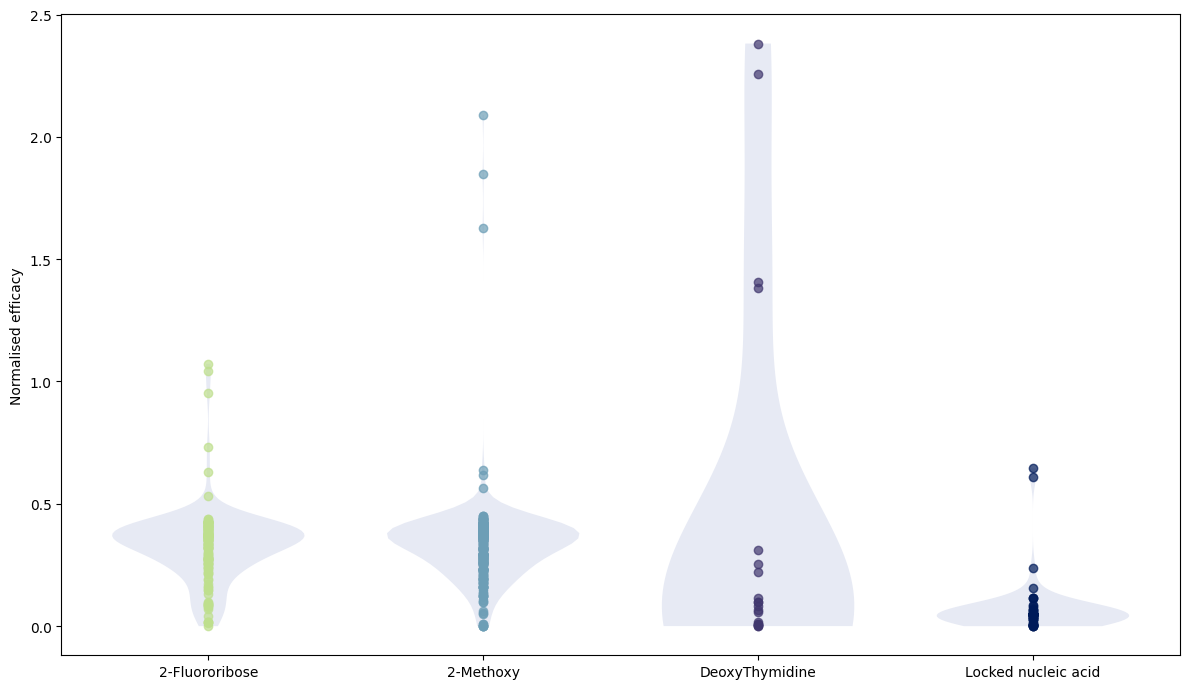

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

def plot_relationship(df, x_col, y_col, categories_list):
    """
    Строит точечный график с violin plots распределения Y для каждого значения X,
    точки каждой категории окрашены в уникальный цвет, ось X отображает категории,
    легенда и отдельное окрашивание по другому признаку не нужны.

    Args:
        df (pd.DataFrame): Входной DataFrame.
        x_col (str): Название столбца для оси x (категории модификаций).
        y_col (str): Название столбца для оси y (нормированная эффективность).
        categories_list (list): Список категорий модификаций.
    """

    plt.figure(figsize=(12, 7))
    ax_main = plt.gca()

    # Define custom colormap for categories
    num_categories = len(categories_list)
    if num_categories == 0:
        cmap = ListedColormap(['#E1E5F2'])
        colors = ['#D4E4BC']
    elif num_categories == 1:
        cmap = ListedColormap(['#92B4F4'])
        colors = ['#96ACB7']
    elif num_categories == 2:
        cmap = ListedColormap(['#92B4F4', '#4472CA'])
        colors = ['#92B4F4', '#36558F']
    elif num_categories == 4:
        cmap = ListedColormap(['#92B4F4', '#4472CA', '#001B5A', '#40376E'])
        colors = ['#BEDF8D', '#6D9EB6', '#40376E', '#001B5A']
    else:
        cmap = plt.get_cmap('viridis', num_categories) # Or any other suitable cmap
        colors = [cmap(i) for i in range(num_categories)]

    ax_main.set_xlabel('')
    ax_main.set_ylabel('Normalised efficacy')
    ax_main.set_title(f'')

    # Настройка оси X для отображения категорий
    ax_main.set_xticks(range(len(categories_list)))
    ax_main.set_xticklabels(categories_list)


    # Violin plots - draw them in background
    for i, category in enumerate(categories_list):
        y_for_x = df[y_col][df[x_col] == category].dropna()
        if len(y_for_x) > 1:
            parts = ax_main.violinplot(y_for_x, positions=[i], vert=True, widths=0.7, showmeans=False, showextrema=False, showmedians = False)
            for pc in parts['bodies']:
                pc.set_facecolor('#E1E5F2')
                pc.set_alpha(0.8)

    # Scatter plot with unique colors for each category - now after violin plots
    for i, category in enumerate(categories_list):
        category_data = df[df[x_col] == category]
        ax_main.scatter(category_data[x_col].apply(lambda x: categories_list.index(x)), category_data[y_col], c=colors[i], label=category, alpha=0.7, zorder=2)


    ax_main.grid(False)
    plt.tight_layout()
    plt.savefig('modifications_plot.png', dpi=1200)
    plt.show()


# Пример использования:
# Предположим, что final_df уже определен и содержит данные

# Определите список категорий
categories_list = sorted(final_df['category'].dropna().unique())
plot_relationship(final_df, 'category', 'Normalized_value', categories_list)

<ipython-input-41-a690cf24949d>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=14)


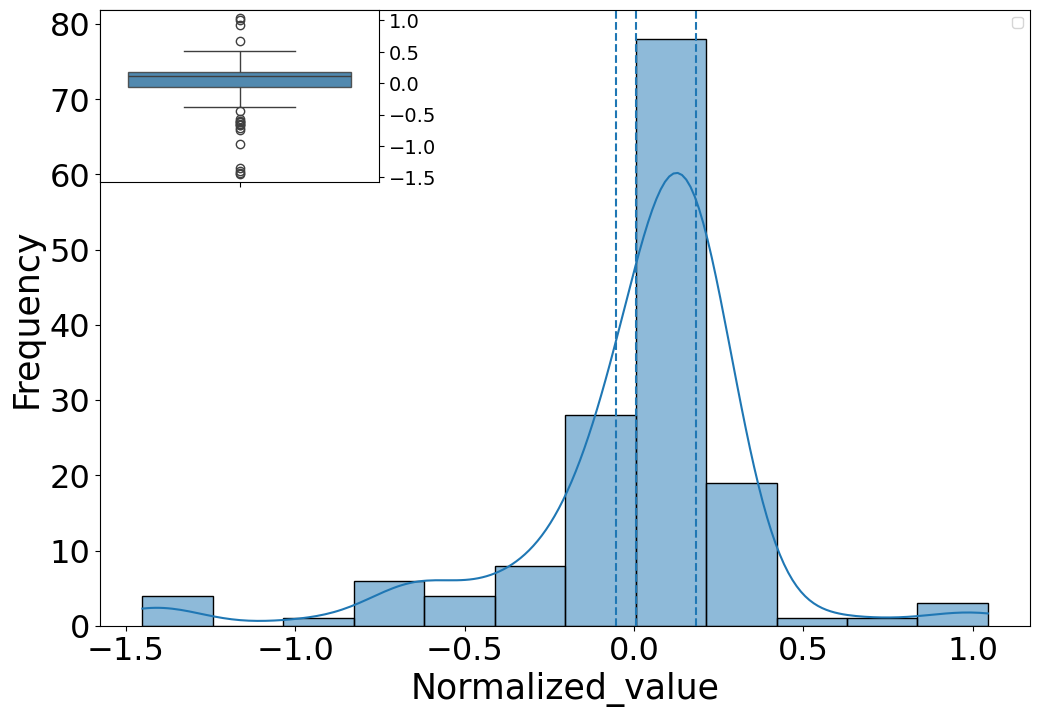

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=False, sharey=False)

x = str('Normalized_value')
# Гистограмма и KDE
variable = new_df[x].fillna(new_df[x].mean())
sns.histplot(variable, kde=True, alpha=.5, bins=30, binwidth=0.2, ax=ax) #kde=True adds the KDE line

des = new_df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(False)
ax.legend() #add legend to show the lines

ax.tick_params(axis='both', labelsize=23)

# Бокс-плот (inset)
ax_inset = plt.gca().inset_axes([0., 0.72, 0.3, 0.28])

sns.boxplot(new_df[f'Normalized_value'], ax=ax_inset, boxprops=dict(alpha=.85))
ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=14)
ax_inset.yaxis.set_label_position("right")
ax_inset.yaxis.tick_right()
ax_inset.set_ylabel(f'', fontsize=19)
ax_inset.grid(False)
ax_inset.set_title("")

plt.title(f'')
plt.xlabel('Normalized_value', fontsize=25)
plt.ylabel('Frequency', fontsize=25)

#plt.savefig(f'Efficacy_with_mismatches.png', dpi=1000) #changed filename to avoid overwriting
plt.show()

<Axes: >

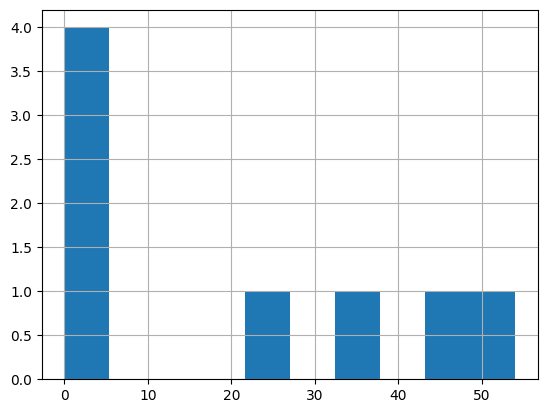

In [ ]:
new_df['Efficacy, %'].hist()